In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
country_wise = pd.read_csv("country_wise_latest.csv")
Covid_19_clean = pd.read_csv("covid_19_clean_complete.csv")
day_wise = pd.read_csv("day_wise.csv")
full_grouped = pd.read_csv("full_grouped.csv")
usa_country_wise = pd.read_csv("usa_county_wise.csv")
worldometer_data = pd.read_csv("worldometer_data.csv")

<h4>Country_wise Dataset EDA</h4>

In [3]:
country_wise.head(2)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe


In [4]:
# Shape and Information of the dataset
print("Shape of country_wise Data = {}".format(country_wise.shape))
print("Columns Name =\n", country_wise.columns)
print("\n Data Information")
country_wise.info()

Shape of country_wise Data = (187, 15)
Columns Name =
 Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

 Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           1

In [5]:
#Describe of the dataset
country_wise.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,187.0,88130.935829,383318.663831,10.00,1114.000,5059.00,40460.500,4290259.00
Deaths,187.0,3497.518717,14100.002482,0.00,18.500,108.00,734.000,148011.00
Recovered,187.0,50631.481283,190188.189643,0.00,626.500,2815.00,22606.000,1846641.00
Active,187.0,34001.935829,213326.173371,0.00,141.500,1600.00,9149.000,2816444.00
New cases,187.0,1222.957219,5710.374790,0.00,4.000,49.00,419.500,56336.00
New deaths,187.0,28.957219,120.037173,0.00,0.000,1.00,6.000,1076.00
New recovered,187.0,933.812834,4197.719635,0.00,0.000,22.00,221.000,33728.00
Deaths / 100 Cases,187.0,3.019519,3.454302,0.00,0.945,2.15,3.875,28.56
Recovered / 100 Cases,187.0,64.820535,26.287694,0.00,48.770,71.32,86.885,100.00
Deaths / 100 Recovered,187.0,39.473850,332.178192,0.00,1.295,3.51,6.190,3259.26


In [6]:
#Unique Values counts 
unique_values = {}
for col in country_wise.columns:
  unique_values[col] = country_wise[col].value_counts().shape[0]

pd.DataFrame(unique_values, index =['Unique value count']).T

,Unique value count
Country/Region,187
Confirmed,184
Deaths,150
Recovered,178
Active,173
New cases,122
New deaths,38
New recovered,103
Deaths / 100 Cases,145
Recovered / 100 Cases,177


In [7]:
#Shape of the dataset
country_wise.shape

(187, 15)

In [8]:
#Duplicate checking
duplicates = country_wise[country_wise.duplicated(keep = 'first')]
print("Duplicate rows ",len(duplicates))

Duplicate rows  0


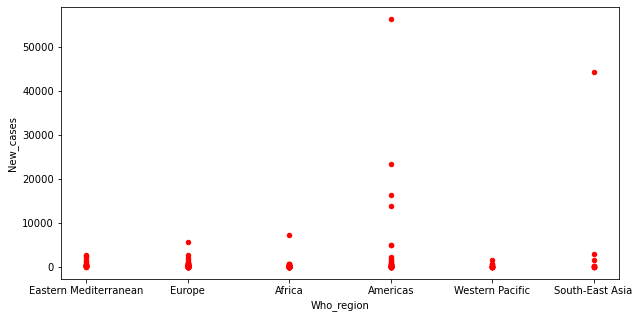

In [9]:
#Visualization of the two varaible 
Who_region =[country_wise["WHO Region"]] 
New_cases = [country_wise["New cases"]]
data={'Who_region':country_wise["WHO Region"],
      'New_cases':country_wise["New cases"],
      'country':country_wise["Country/Region"]}
  
# Load data into DataFrame
df = pd.DataFrame(data = data);
df.plot.scatter(x = 'Who_region', y = 'New_cases',c='red',colormap='viridis',figsize=(10, 5));

In [10]:
#numeric columns
numeric_columns = list(country_wise.select_dtypes(include=np.number).columns)
numeric_columns

['Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'New cases',
 'New deaths',
 'New recovered',
 'Deaths / 100 Cases',
 'Recovered / 100 Cases',
 'Deaths / 100 Recovered',
 'Confirmed last week',
 '1 week change',
 '1 week % increase']

array([[<AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>,
        <AxesSubplot:title={'center':'Recovered'}>,
        <AxesSubplot:title={'center':'Active'}>],
       [<AxesSubplot:title={'center':'New cases'}>,
        <AxesSubplot:title={'center':'New deaths'}>,
        <AxesSubplot:title={'center':'New recovered'}>,
        <AxesSubplot:title={'center':'Deaths / 100 Cases'}>],
       [<AxesSubplot:title={'center':'Recovered / 100 Cases'}>,
        <AxesSubplot:title={'center':'Deaths / 100 Recovered'}>,
        <AxesSubplot:title={'center':'Confirmed last week'}>,
        <AxesSubplot:title={'center':'1 week change'}>],
       [<AxesSubplot:title={'center':'1 week % increase'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

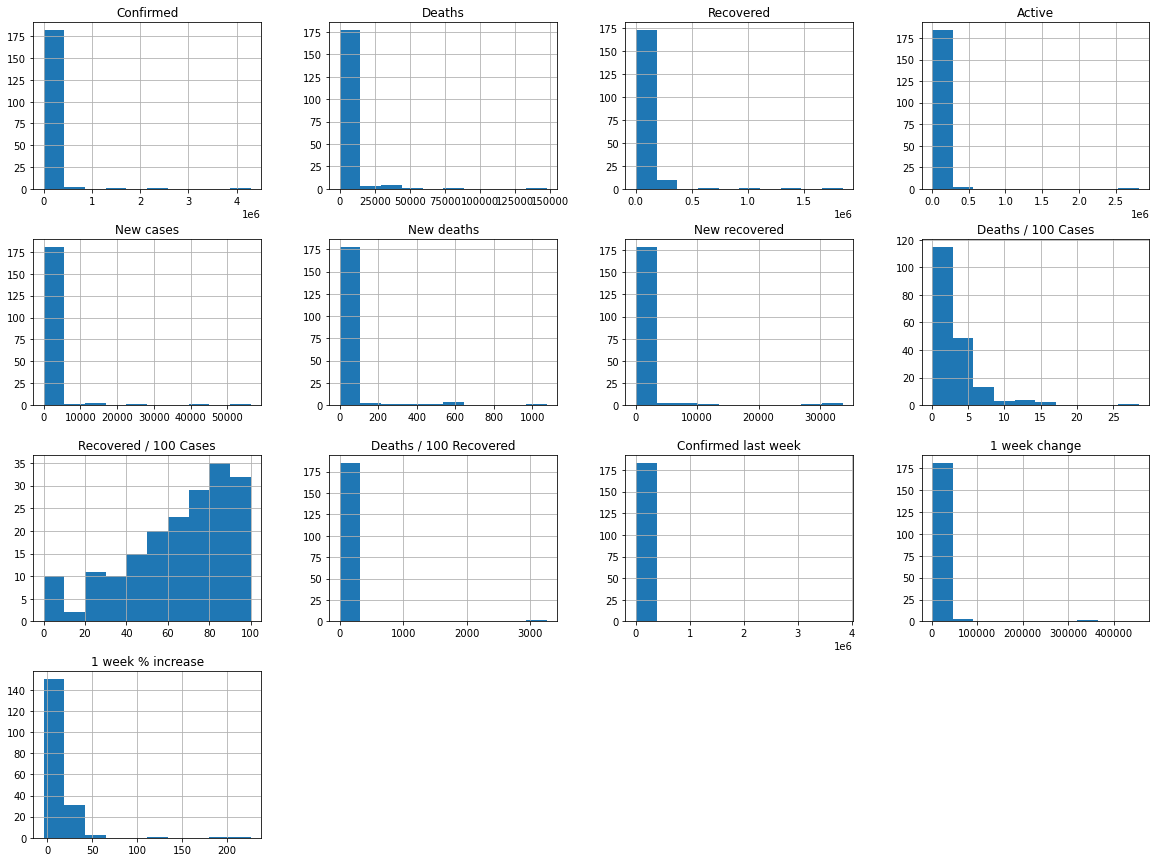

In [11]:
country_wise.hist(figsize=(20,15))

<h4>Covid_19_clean EDA</h4>

In [12]:
Covid_19_clean.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [13]:
# Shape and Information of the dataset
print("Shape of country_wise Data = {}".format(Covid_19_clean.shape))
print("Columns Name =\n", Covid_19_clean.columns)
print("\n Data Information")
Covid_19_clean.info()

Shape of country_wise Data = (49068, 10)
Columns Name =
 Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

 Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [14]:
#Describe of the dataset
Covid_19_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,49068.0,21.433730,24.950320,-51.7963,7.873054,23.6345,41.204380,7.170690e+01
Long,49068.0,23.528236,70.442740,-135.0000,-15.310100,21.7453,80.771797,1.780650e+02
Confirmed,49068.0,16884.904255,127300.205272,0.0000,4.000000,168.0000,1518.250000,4.290259e+06
Deaths,49068.0,884.179160,6313.584411,0.0000,0.000000,2.0000,30.000000,1.480110e+05
Recovered,49068.0,7915.713479,54800.918731,0.0000,0.000000,29.0000,666.000000,1.846641e+06
Active,49068.0,8085.011617,76258.903026,-14.0000,0.000000,26.0000,606.000000,2.816444e+06


In [15]:
#Unique Values counts 
unique_values = {}
for col in Covid_19_clean.columns:
  unique_values[col] = Covid_19_clean[col].value_counts().shape[0]

pd.DataFrame(unique_values, index =['Unique value count']).T

,Unique value count
Province/State,78
Country/Region,187
Lat,260
Long,261
Date,188
Confirmed,10861
Deaths,3640
Recovered,7609
Active,8641
WHO Region,6


In [16]:
#Shape of the dataset
Covid_19_clean.shape

(49068, 10)

In [17]:
#Duplicate checking
duplicates = Covid_19_clean[Covid_19_clean.duplicated(keep = 'first')]
print("Duplicate rows ",len(duplicates))

Duplicate rows  0


array([[<AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Long'}>],
       [<AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>],
       [<AxesSubplot:title={'center':'Recovered'}>,
        <AxesSubplot:title={'center':'Active'}>]], dtype=object)

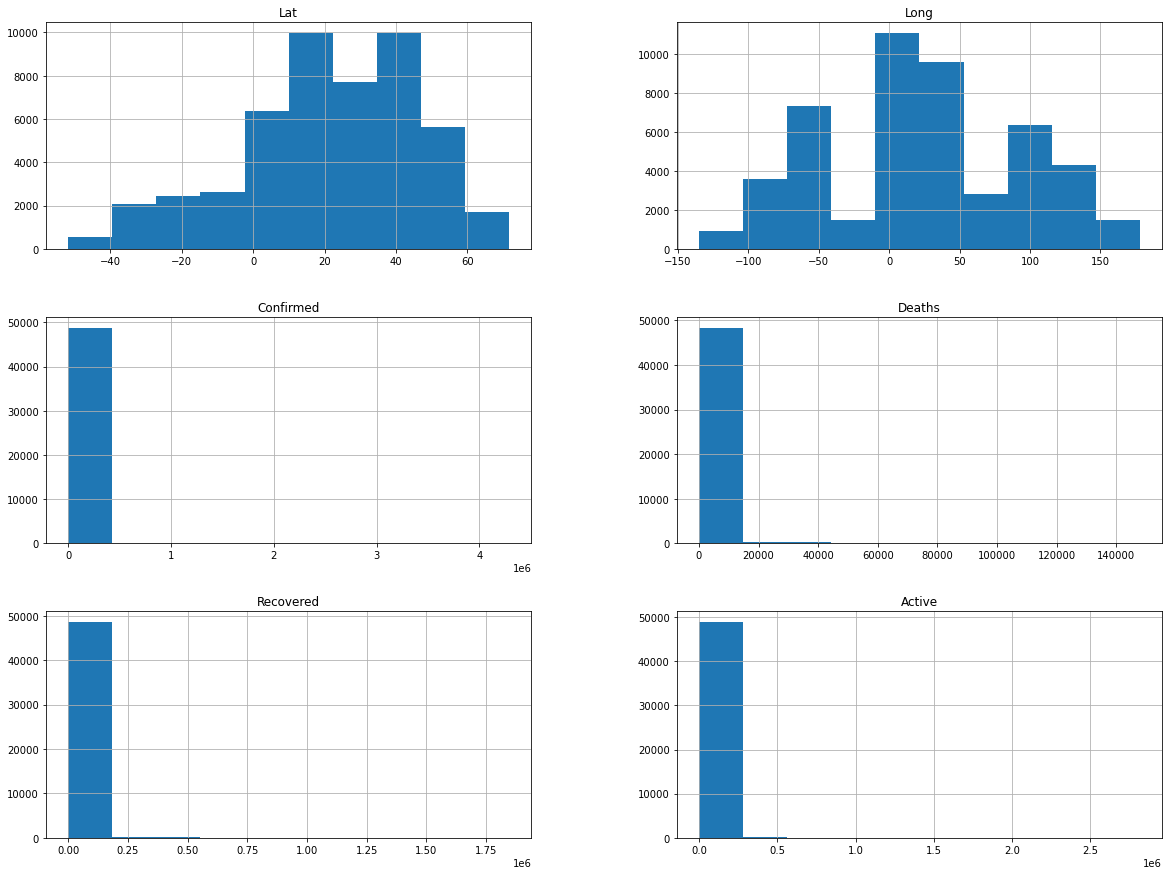

In [18]:
Covid_19_clean.hist(figsize=(20,15))

<h4>day_wise Dataset EDA</h4>

In [19]:
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [20]:
# Shape and Information of the dataset
print("Shape of country_wise Data = {}".format(day_wise.shape))
print("Columns Name =\n", day_wise.columns)
print("\n Data Information")
day_wise.info()

Shape of country_wise Data = (188, 12)
Columns Name =
 Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

 Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9 

In [21]:
#Describe of the dataset
day_wise.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,188.0,4.406960e+06,4.757988e+06,555.00,112191.000,2848733.00,7.422046e+06,16480485.00
Deaths,188.0,2.307708e+05,2.179291e+05,17.00,3935.000,204190.00,4.186345e+05,654036.00
Recovered,188.0,2.066001e+06,2.627976e+06,28.00,60441.250,784784.00,3.416396e+06,9468087.00
Active,188.0,2.110188e+06,1.969670e+06,510.00,58641.750,1859759.00,3.587015e+06,6358362.00
New cases,188.0,8.777102e+04,7.529529e+04,0.00,5568.500,81114.00,1.315025e+05,282756.00
New deaths,188.0,3.478824e+03,2.537736e+03,0.00,250.750,4116.00,5.346000e+03,9966.00
New recovered,188.0,5.036202e+04,5.609089e+04,0.00,2488.250,30991.50,7.970625e+04,284394.00
Deaths / 100 Cases,188.0,4.860638e+00,1.579541e+00,2.04,3.510,4.85,6.297500e+00,7.18
Recovered / 100 Cases,188.0,3.434394e+01,1.620616e+01,1.71,22.785,35.68,4.894500e+01,57.45
Deaths / 100 Recovered,188.0,2.210452e+01,2.256831e+01,6.26,9.650,15.38,2.534250e+01,134.43


In [22]:
#Unique Values counts 
unique_values = {}
for col in day_wise.columns:
  unique_values[col] = day_wise[col].value_counts().shape[0]

pd.DataFrame(unique_values, index =['Unique value count']).T

,Unique value count
Date,188
Confirmed,188
Deaths,188
Recovered,188
Active,188
New cases,188
New deaths,185
New recovered,188
Deaths / 100 Cases,162
Recovered / 100 Cases,185


In [23]:
#Shape of the dataset
day_wise.shape

(188, 12)

In [24]:
#Duplicate checking
duplicates = day_wise[day_wise.duplicated(keep = 'first')]
print("Duplicate rows ",len(duplicates))

Duplicate rows  0


array([[<AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>,
        <AxesSubplot:title={'center':'Recovered'}>],
       [<AxesSubplot:title={'center':'Active'}>,
        <AxesSubplot:title={'center':'New cases'}>,
        <AxesSubplot:title={'center':'New deaths'}>],
       [<AxesSubplot:title={'center':'New recovered'}>,
        <AxesSubplot:title={'center':'Deaths / 100 Cases'}>,
        <AxesSubplot:title={'center':'Recovered / 100 Cases'}>],
       [<AxesSubplot:title={'center':'Deaths / 100 Recovered'}>,
        <AxesSubplot:title={'center':'No. of countries'}>,
        <AxesSubplot:>]], dtype=object)

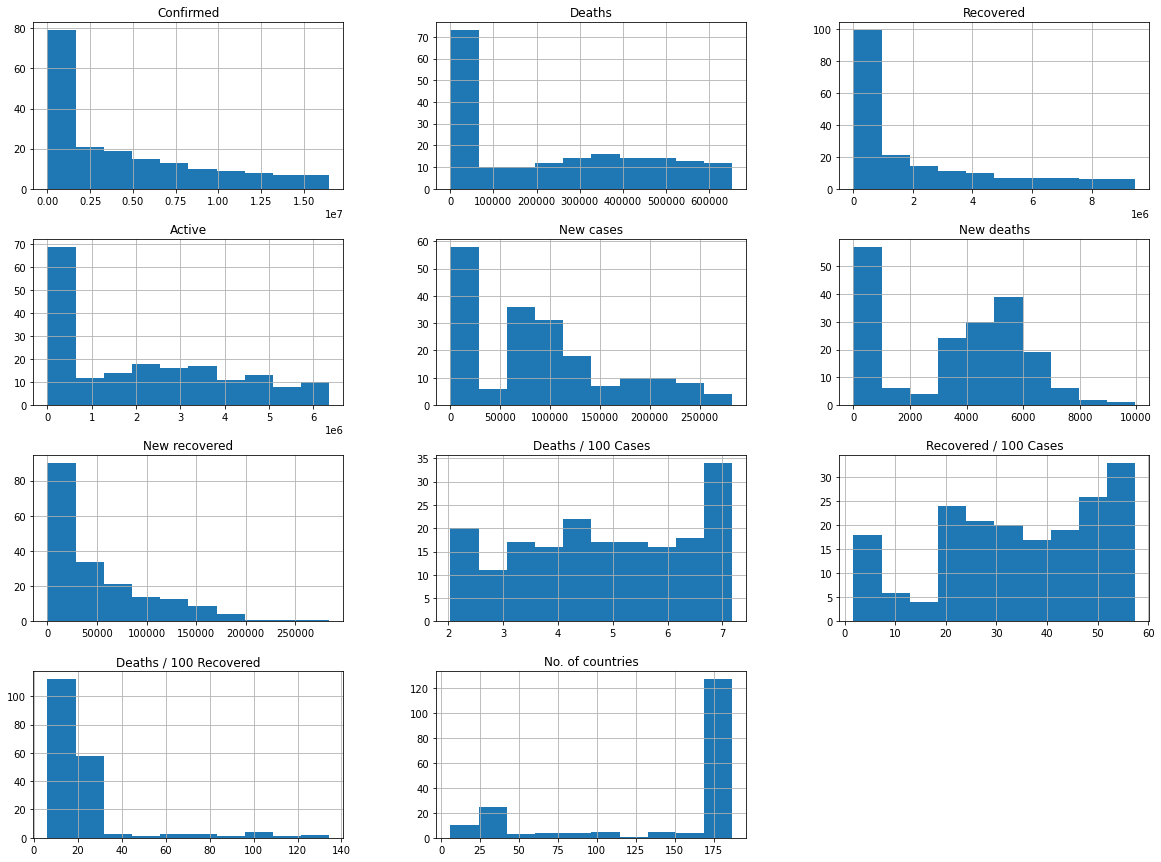

In [25]:
day_wise.hist(figsize=(20,15))

<h4>Data Visualization for Full_Grouped CSV</h4>

> Indented block



In [26]:
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [27]:
#shape of the Dataset
print(full_grouped.shape)

(35156, 10)


In [28]:
#Information of dataset
full_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [29]:
#numeric columns
numeric_columns = list(full_grouped.select_dtypes(include=np.number).columns)
numeric_columns

['Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'New cases',
 'New deaths',
 'New recovered']

In [30]:
#Columns with unique count less than equal to 10 alongwith their values
dict_unique_count = {
    'Column' : [],
    'Count' : []
}

for col in full_grouped.columns:
    dict_unique_count['Column'].append(col)
    dict_unique_count['Count'].append(full_grouped[col].nunique())
    
df_unique = pd.DataFrame(dict_unique_count)
df_unique = df_unique[df_unique['Count'] <= 10]

for col in df_unique['Column']:
    print(f"{col} has {full_grouped[col].unique()} values\n")

WHO Region has ['Eastern Mediterranean' 'Europe' 'Africa' 'Americas' 'Western Pacific'
 'South-East Asia'] values



In [31]:
#Duplicates
Duplicated = full_grouped[full_grouped.duplicated(keep='first')]
print('Duplicate count : ', Duplicated.shape[0])
full_grouped = full_grouped.drop_duplicates(inplace=False)

Duplicate count :  0


In [32]:
#Null values
dft = pd.DataFrame({ 'Count': full_grouped.isnull().sum(), '% age': full_grouped.isnull().sum() * 100 /full_grouped.shape[0] })
print(dft.sort_values(by=['Count']))

                Count  % age
Date                0    0.0
Country/Region      0    0.0
Confirmed           0    0.0
Deaths              0    0.0
Recovered           0    0.0
Active              0    0.0
New cases           0    0.0
New deaths          0    0.0
New recovered       0    0.0
WHO Region          0    0.0


array([[<AxesSubplot:title={'center':'Confirmed'}>,
        <AxesSubplot:title={'center':'Deaths'}>,
        <AxesSubplot:title={'center':'Recovered'}>],
       [<AxesSubplot:title={'center':'Active'}>,
        <AxesSubplot:title={'center':'New cases'}>,
        <AxesSubplot:title={'center':'New deaths'}>],
       [<AxesSubplot:title={'center':'New recovered'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

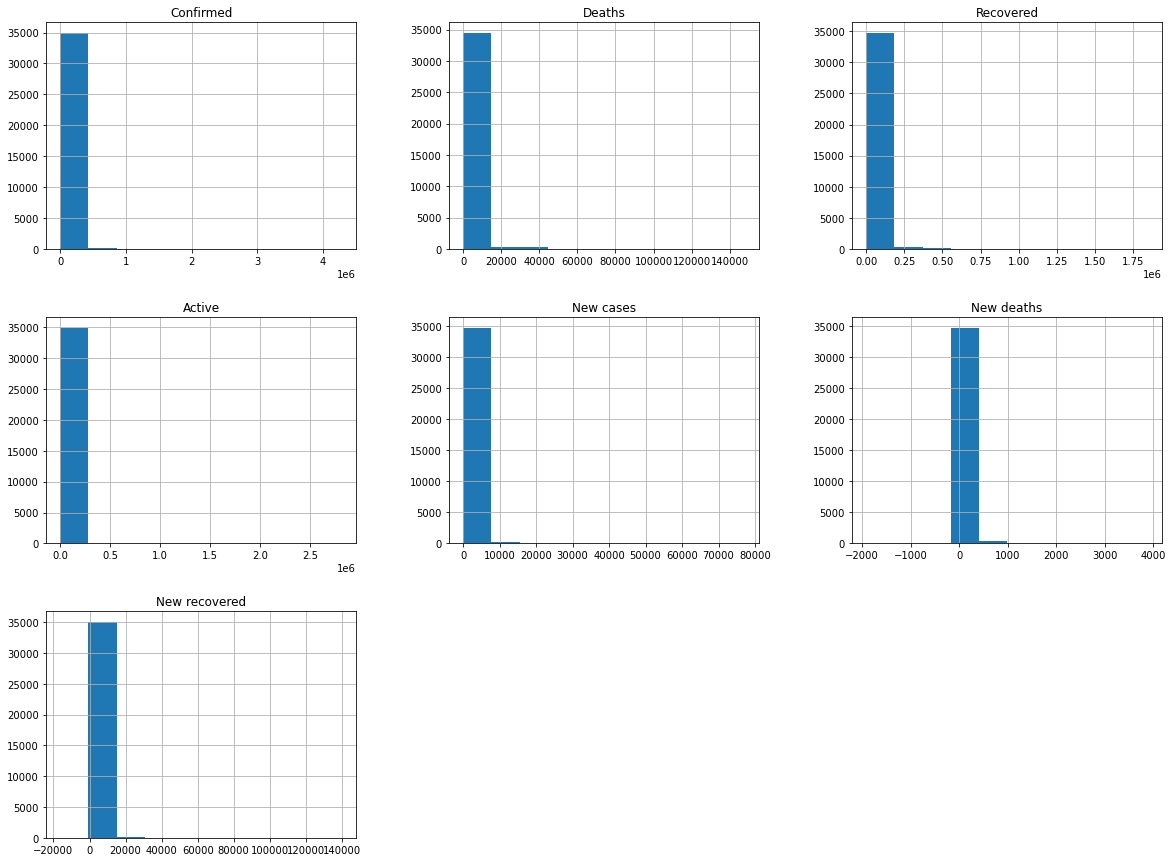

In [34]:
full_grouped.hist(figsize=(20,15))

<h4>USA_Country_Dataset</h4>

```
# This is formatted as code
```



In [35]:
usa_country_wise.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [36]:
#shape of the dataset
print(usa_country_wise.shape)

(627920, 14)


In [37]:
#information of the dataset
usa_country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [38]:
#numeric columns 
numeric_columns = list(usa_country_wise.select_dtypes(include=np.number).columns)
numeric_columns

['UID', 'code3', 'FIPS', 'Lat', 'Long_', 'Confirmed', 'Deaths']

In [39]:
#Columns with unique count less than equal to 10 alongwith their values

dict_unique_count = {
    'Column' : [],
    'Count' : []
}

for col in usa_country_wise.columns:
    dict_unique_count['Column'].append(col)
    dict_unique_count['Count'].append(usa_country_wise[col].nunique())
    
df_unique = pd.DataFrame(dict_unique_count)
df_unique = df_unique[df_unique['Count'] <= 10]

for col in df_unique['Column']:
    print(f"{col} has {usa_country_wise[col].unique()} values\n")

iso2 has ['AS' 'GU' 'MP' 'PR' 'VI' 'US'] values

iso3 has ['ASM' 'GUM' 'MNP' 'PRI' 'VIR' 'USA'] values

code3 has [ 16 316 580 630 850 840] values

Country_Region has ['US'] values



In [40]:
#Duplicate counts 
Duplicated = usa_country_wise[usa_country_wise.duplicated(keep='first')]
print('Duplicate count : ', Duplicated.shape[0])
usa_county_wise = usa_country_wise.drop_duplicates(inplace=False)

Duplicate count :  0


In [41]:
#check Null in the dataset
dft = pd.DataFrame({ 'Count': usa_country_wise.isnull().sum(), '% age': usa_country_wise.isnull().sum() * 100 /usa_country_wise.shape[0] })
print(dft.sort_values(by=['Count']))

                Count     % age
UID                 0  0.000000
iso2                0  0.000000
iso3                0  0.000000
code3               0  0.000000
Province_State      0  0.000000
Country_Region      0  0.000000
Lat                 0  0.000000
Long_               0  0.000000
Combined_Key        0  0.000000
Date                0  0.000000
Confirmed           0  0.000000
Deaths              0  0.000000
Admin2           1128  0.179641
FIPS             1880  0.299401


array([[<AxesSubplot:title={'center':'UID'}>,
        <AxesSubplot:title={'center':'code3'}>,
        <AxesSubplot:title={'center':'FIPS'}>],
       [<AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Long_'}>,
        <AxesSubplot:title={'center':'Confirmed'}>],
       [<AxesSubplot:title={'center':'Deaths'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

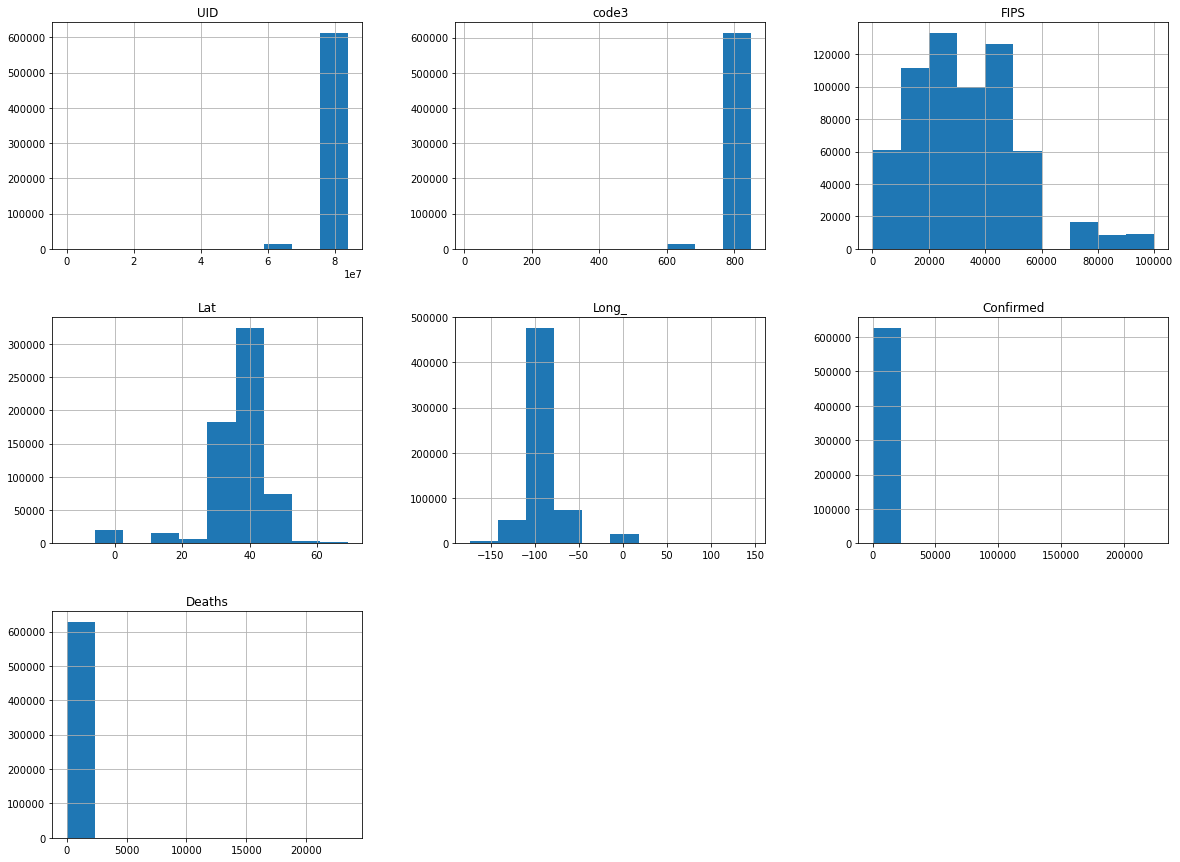

In [42]:
#Check Distribution of numeric values
usa_country_wise.hist(figsize=(20,15))

<h4> worldometer_data DataSet</h4>

```
# This is formatted as code
```



In [43]:
worldometer_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [44]:
#Shape of the dataset 
print(worldometer_data.shape)

(209, 16)


In [45]:
#Information of the dataset 
worldometer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [46]:
#Numeric Columns 
numeric_columns = list(worldometer_data.select_dtypes(include=np.number).columns)
numeric_columns

['Population',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop']

In [47]:
# Columns with unique count less than equal to 10 alongwith their values
dict_unique_count = {
    'Column' : [],
    'Count' : []
}

for col in worldometer_data.columns:
    dict_unique_count['Column'].append(col)
    dict_unique_count['Count'].append(worldometer_data[col].nunique())
    
df_unique = pd.DataFrame(dict_unique_count)
df_unique = df_unique[df_unique['Count'] <= 10]

for col in df_unique['Column']:
    print(f"{col} has {worldometer_data[col].unique()} values\n")


Continent has ['North America' 'South America' 'Asia' 'Europe' 'Africa'
 'Australia/Oceania' nan] values

NewCases has [  nan 6590. 1282.   20.   30.] values

NewDeaths has [ nan 819.  80.   1.] values

NewRecovered has [  nan 4140.  936.   42.] values

WHO Region has ['Americas' 'South-EastAsia' 'Europe' 'Africa' 'EasternMediterranean'
 'WesternPacific' nan] values



In [48]:
#Checking duplicates 
Duplicated = worldometer_data[worldometer_data.duplicated(keep='first')]
print('Duplicate count : ', Duplicated.shape[0])
worldometer_data = worldometer_data.drop_duplicates(inplace=False)

Duplicate count :  0


In [49]:
#Check Null values 
dft = pd.DataFrame({ 'Count': worldometer_data.isnull().sum(), '% age': worldometer_data.isnull().sum() * 100 /worldometer_data.shape[0] })
print(dft.sort_values(by=['Count']))

                  Count      % age
Country/Region        0   0.000000
TotalCases            0   0.000000
Continent             1   0.478469
Population            1   0.478469
Tot Cases/1M pop      1   0.478469
TotalRecovered        4   1.913876
ActiveCases           4   1.913876
TotalTests           18   8.612440
Tests/1M pop         18   8.612440
TotalDeaths          21  10.047847
Deaths/1M pop        22  10.526316
WHO Region           25  11.961722
Serious,Critical     87  41.626794
NewCases            205  98.086124
NewDeaths           206  98.564593
NewRecovered        206  98.564593


array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'TotalCases'}>,
        <AxesSubplot:title={'center':'NewCases'}>,
        <AxesSubplot:title={'center':'TotalDeaths'}>],
       [<AxesSubplot:title={'center':'NewDeaths'}>,
        <AxesSubplot:title={'center':'TotalRecovered'}>,
        <AxesSubplot:title={'center':'NewRecovered'}>,
        <AxesSubplot:title={'center':'ActiveCases'}>],
       [<AxesSubplot:title={'center':'Serious,Critical'}>,
        <AxesSubplot:title={'center':'Tot Cases/1M pop'}>,
        <AxesSubplot:title={'center':'Deaths/1M pop'}>,
        <AxesSubplot:title={'center':'TotalTests'}>],
       [<AxesSubplot:title={'center':'Tests/1M pop'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

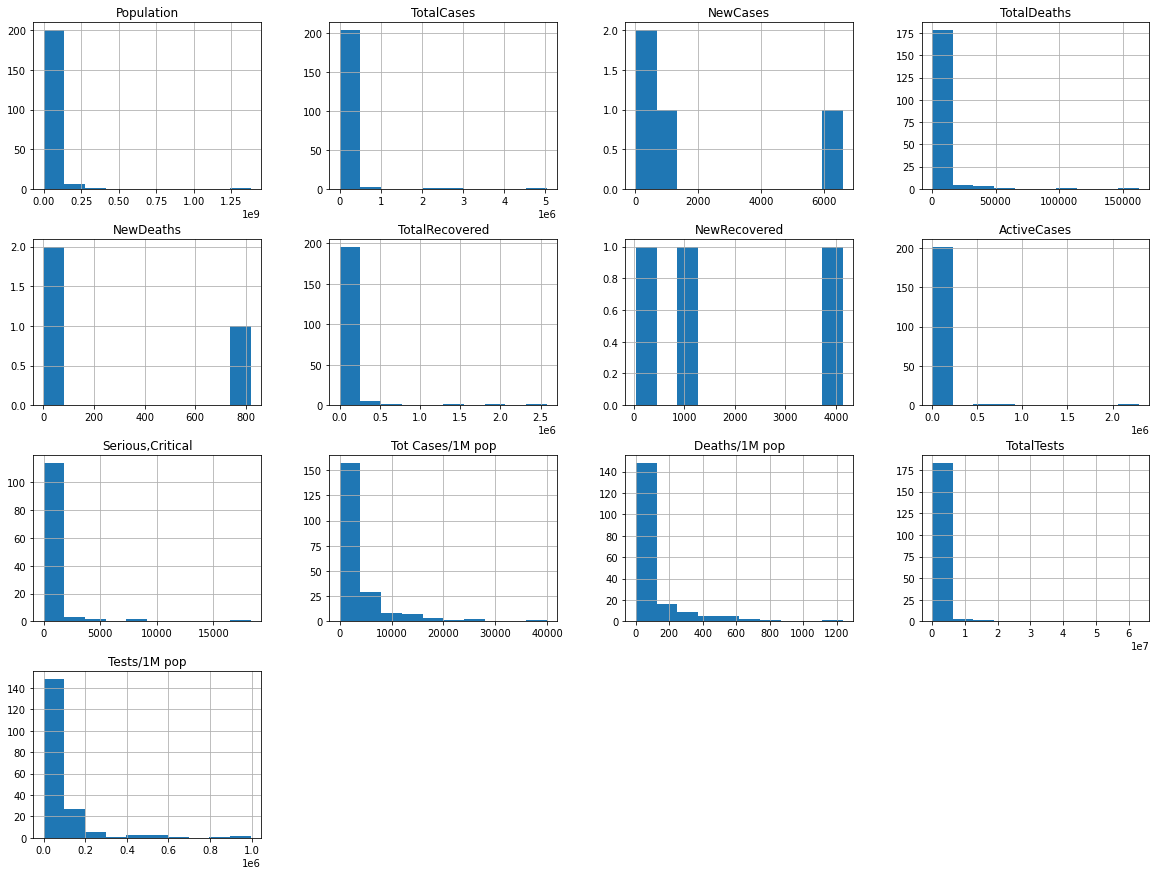

In [50]:
#Check distribution of numeric values 
worldometer_data.hist(figsize=(20,15))